In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [167]:
sim1 = pd.read_csv('newData/simout_1.csv')
sim1.head()

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
2,0.03,0.27124,3645.2,4444.6,9.2110,32.627,47.649,2799.0,63.644,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
3,0.04,0.27062,3653.2,4459.6,9.3142,32.493,47.579,2798.6,64.830,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
4,0.05,0.27134,3668.2,4486.7,9.2479,32.295,47.595,2799.2,64.585,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [509]:
def sig_corr(x1, x2, wlag, t_amostragem):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    return np.array([(np.argmax(correlations) + 1)*t_amostragem, np.max(correlations)])

In [510]:
sig_corr(np.array([1,3,4]), np.array([1,3,4]), 2, 0.01)

array([ 0.01      ,  8.66666667])

In [521]:
wlag = int(20/0.01)
tam_m = len(sim1.columns[1:])
m_corr = np.zeros((tam_m,tam_m), dtype=np.ndarray)
for i, x in enumerate(sim1.columns[1:]):
    for j, y in enumerate(sim1.columns[1:]):
         m_corr[i][j] = sig_corr(np.array(sim1[x]), np.array(sim1[y]),wlag, 0.01)

In [517]:
m_corr[0][0][:]

array([ 40.        ,   0.07138961])

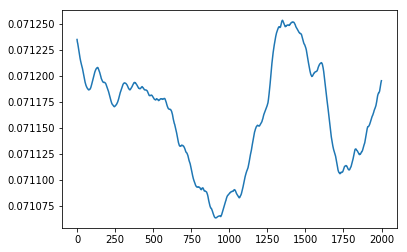

In [519]:
wlag = 2000
correlations = np.zeros(wlag)
for i in np.arange(0, wlag):
    correlations[i] = (1/(len(sim1['x1']) - i))*np.dot(sim1['x1'][i:],sim1['x1'][:(len(sim1['x1']) - i)])
plt.plot(correlations)
plt.show()